<a href="https://colab.research.google.com/github/nhatnhat2210/Colab/blob/main/Lab_4_20130350_LeMinhNhat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This lab is to continous dealing with **Logistic Regression**, **kNN**, and **Decision Tree** alogirthms applied to classification tasks. 

*   **Deadline: 23:59, 12/03/2023**



# Import libraries

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/Colab'

Mounted at /content/gdrive
/content/gdrive/MyDrive/Colab


In [31]:
# code
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd

#Task 1. 
Apply **LogisticRegression** to iris dataset which aims at classifying species of iris based on sepal_length (chiều dài đài hoa), sepal_width, petal_length (chiều dài cánh hoa), petal_width. The species are '**setosa**' '**versicolor**' and '**virginica**'. 



```
from sklearn import datasets
data4 = datasets.load_iris()
```




In [3]:
# code
data4 = datasets.load_iris()
x = data4.data
y = data4.target
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7)

Confusion Matrix : 
 [[17  0  0]
 [ 0 11  0]
 [ 0  2 15]]
Accuracy :  0.9555555555555556


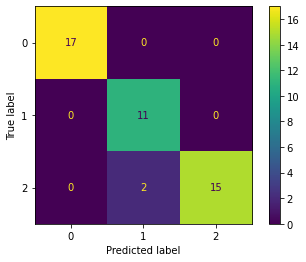

In [4]:
#
classifier = LogisticRegression(random_state = 0) 
classifier.fit(x_train, y_train)
#Test 
y_pred = classifier.predict(x_test)
#Confustion matrix
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cm)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
#Accuracy
print ("Accuracy : ", accuracy_score(y_test, y_pred))


#Task 2. 
Apply LogisticRegression to **MNIST** dataset (mnist.csv) which aims at classifying handwritten digits. Dataset includes 784 pixels values of images (28x28). 


```
from sklearn import datasets
# load the MNIST digits dataset
mnist = datasets.load_digits()
```



In [5]:
# code
mnist = datasets.load_digits()
mnist
x = mnist.data
y = mnist.target
x2_train, x2_test, y2_train, y2_test = train_test_split(x, y, train_size=0.7)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix : 
 [[44  0  0  0  0  1  0  0  0  0]
 [ 0 54  0  0  0  0  0  0  1  1]
 [ 0  1 46  0  0  0  0  0  0  0]
 [ 0  0  0 55  0  1  0  0  0  1]
 [ 0  1  0  0 50  0  0  0  0  0]
 [ 0  0  0  1  1 49  0  0  0  1]
 [ 0  1  0  0  0  0 55  0  0  0]
 [ 0  0  0  0  1  0  0 57  0  0]
 [ 0  3  1  0  0  0  0  1 50  0]
 [ 1  0  0  0  0  1  0  0  1 60]]
Accuracy :  0.9629629629629629


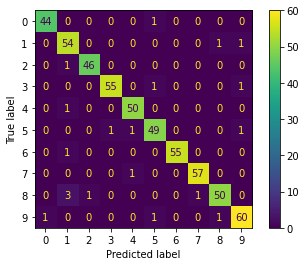

In [6]:
#
classifier = LogisticRegression(random_state = 0) 
classifier.fit(x2_train, y2_train)
#Test 
y2_pred = classifier.predict(x2_test)
#Confustion matrix
cm2 = confusion_matrix(y2_test, y2_pred)
print ("Confusion Matrix : \n", cm2)
ConfusionMatrixDisplay.from_predictions(y2_test, y2_pred)
#Accuracy
print ("Accuracy : ", accuracy_score(y2_test, y2_pred))


#Task 3. 
Apply another classification algorithm named kNN, which is an instance classifcation model. 
*  3.1. Perform kNN algorithm to Iris dataset with k={1, 3, 5, …, 29}. Select the best value of k.

*   3.2. Then compare the obtained results with those using Logistic regression (based on metrics: accuracy, precision, recall, f1 measure).


In [28]:
from IPython.core import macro
from numpy import average
k_range = range(1, 30, 2)
accs = []
preciss = []
recalls = []
f1 = []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train, y_train)
  y_pred_k = knn.predict(x_test)
  accs.append(metrics.accuracy_score(y_test, y_pred_k))
  preciss.append(metrics.precision_score(y_test, y_pred_k, average='macro'))
  recalls.append(metrics.recall_score(y_test, y_pred_k, average='macro'))
  f1.append(metrics.f1_score(y_test, y_pred_k, average='macro'))

<function matplotlib.pyplot.legend(*args, **kwargs)>

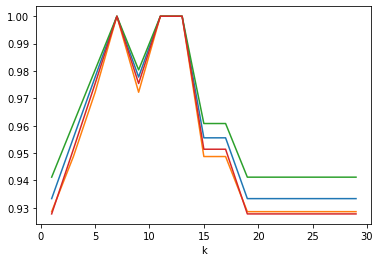

In [29]:
#
plt.plot(k_range, accs, label='Accuracy')
plt.plot(k_range, preciss, label='Precision')
plt.plot(k_range, recalls, label='Recall')
plt.plot(k_range, f1, label='F1')
plt.xlabel("k")
plt.legend



#Task 4. 
Similar to Task 3, apply kNN algorithm to **mnist** dataset which included in datasets of sklearn API.
*  4.1.	Perform kNN algorithm to Iris dataset with k={1, 3, 5, …, 29}. Select the best value of k.
*  4.2.	Then compare the obtained results with those using Logistic regression (based on metrics: accuracy, precision, recall, f1 measure).


In [27]:
# code
k_range = range(1, 30, 2)
accs_2 = []
preciss_2 = []
recalls_2 = []
f1_2 = []
for k in k_range:
  knn2 = KNeighborsClassifier(n_neighbors=k)
  knn2.fit(x2_train, y2_train)
  y_pred_k2 = knn2.predict(x2_test)
  accs_2.append(metrics.accuracy_score(y2_test, y_pred_k2))
  preciss_2.append(metrics.precision_score(y2_test, y_pred_k2, average='macro'))
  recalls_2.append(metrics.recall_score(y2_test, y_pred_k2, average='macro'))
  f1_2.append(metrics.f1_score(y2_test, y_pred_k2, average='macro'))

<function matplotlib.pyplot.legend(*args, **kwargs)>

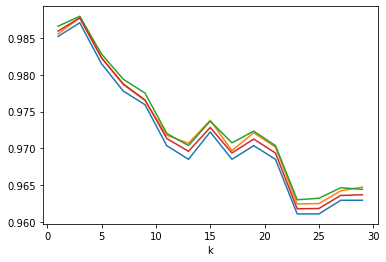

In [30]:
plt.plot(k_range1, accs_2, label='Accuracy')
plt.plot(k_range, preciss_2, label='Precision')
plt.plot(k_range, recalls_2, label='Recall')
plt.plot(k_range, f1_2, label='F1')
plt.xlabel("k")
plt.legend



#Task 5. 
Compare the performance of selected classification algorithms (**Decision Treen, kNN, and Logistic Regression**) to ***spam detection***. The dataset can be accessed from the link: http://archive.ics.uci.edu/ml/datasets/Spambase 
Attribute Information:
The last column of 'spambase.csv denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. Most of the attributes indicate whether a particular word or character was frequently occuring in the e-mail. The run-length attributes (55-57) measure the length of sequences of consecutive capital letters. For the statistical measures of each attribute, see the end of this file. Here are the definitions of the attributes: 
*  48 continuous real [0,100] attributes of type word_freq_WORD 
= percentage of words in the e-mail that match WORD, i.e. 100 * (number of times the WORD appears in the e-mail) / total number of words in e-mail. A "word" in this case is any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string. **Example**: word_freq_address: percentage of words in the e-mail that match ADDRESS.
*  6 continuous real [0,100] attributes of type char_freq_CHAR] 
= percentage of characters in the e-mail that match CHAR, i.e. 100 * (number of CHAR occurences) / total characters in e-mail
*  1 continuous real [1,...] attribute of type capital_run_length_average 
= average length of uninterrupted sequences of capital letters
*  1 continuous integer [1,...] attribute of type capital_run_length_longest 
= length of longest uninterrupted sequence of capital letters
*  1 continuous integer [1,...] attribute of type capital_run_length_total = sum of length of uninterrupted sequences of capital letters = total number of capital letters in the e-mail
*  1 nominal {0,1} class attribute of type spam = denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. 


---


In order to compare the performance of selected algorithms, some common metrics including **accuracy, precision, recall, f1 measures** could be used.


In [38]:
# code



#Finally,
Save a copy in your Github. Remember renaming the notebook.